In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_15220\2231949903.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height'>

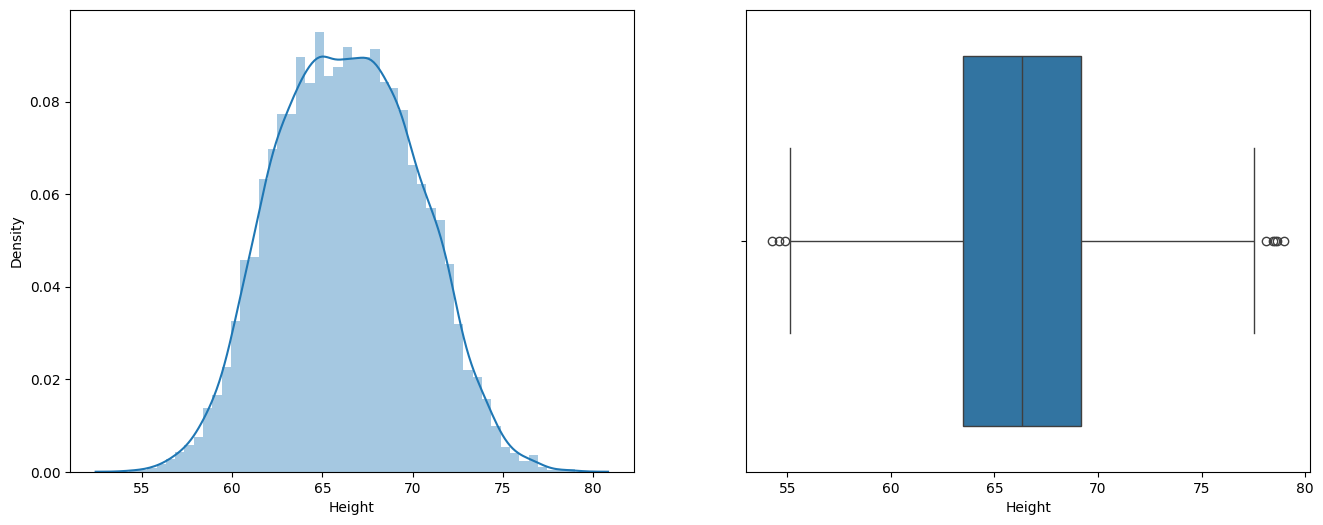

In [8]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df['Height'])

plt.subplot(122)
sns.boxplot(df['Height'], orient='h')

In [25]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [26]:
lower_limit

58.13441158671655

In [27]:
df[(df['Height'] >= upper_limit) | (df['Height'] <= lower_limit)]

,Gender,Height,Weight
23,Male,74.785790,228.761781
190,Male,74.785790,235.035419
197,Male,74.785790,231.924749
202,Male,74.785790,224.124271
215,Male,74.785790,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [28]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [29]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [30]:
new_df.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_15220\4195804835.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height'>

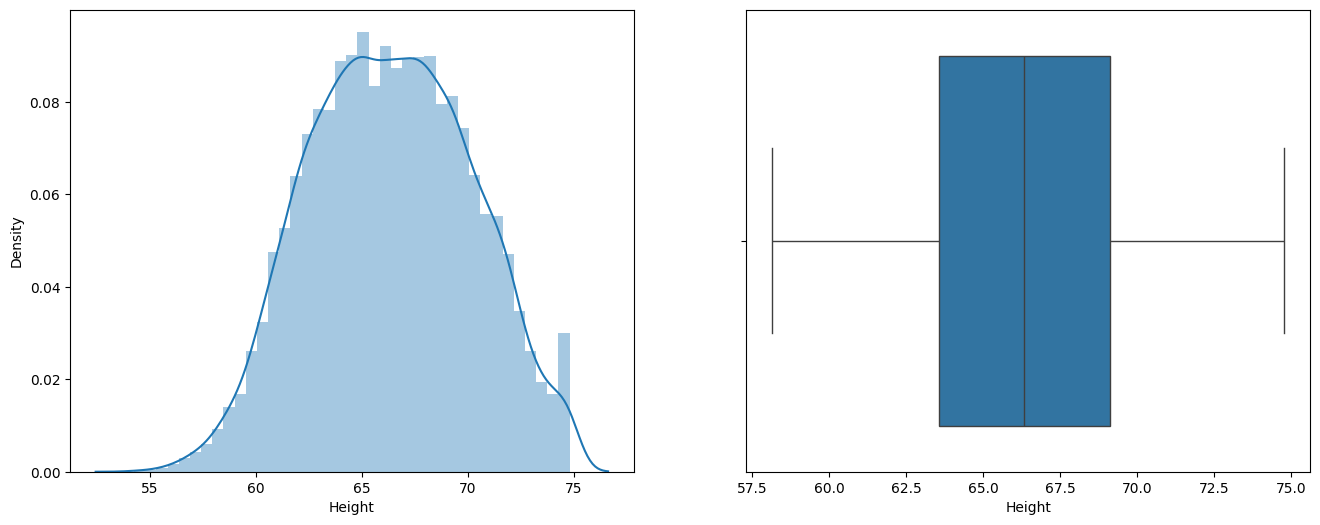

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df['Height'])

plt.subplot(122)
sns.boxplot(new_df['Height'], orient='h')

# Capping --> Winsorization

In [32]:
df['Height'] = np.where(
    df['Height'] >= upper_limit, 
    upper_limit, 
    np.where(
        df['Height'] <= lower_limit,
        lower_limit,
        df['Height']
    )
)

<Axes: xlabel='Height'>

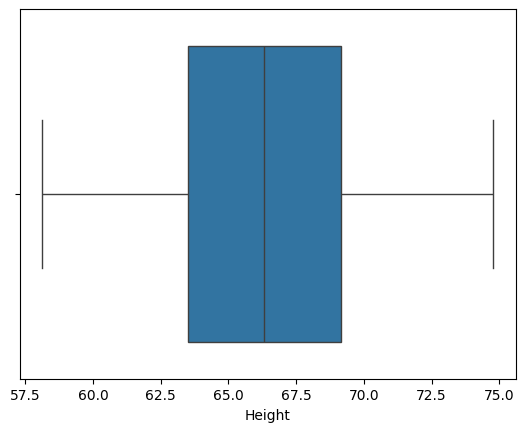

In [33]:
sns.boxplot(df['Height'], orient='h')